## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Play Store Data Analysis 

In [2]:
# Importing Necessary libraries for Future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [3]:
#Mounting Google Drive:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing The Playstore data from the Google drive and reading the csv file:
dataset= pd.read_csv('/content/drive/MyDrive/Alma Better/EDA Capstone Project 1/Play Store Data.csv')
dataset1=pd.read_csv('/content/drive/MyDrive/Alma Better/EDA Capstone Project 1/User Reviews.csv')
dataset1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
#Do Some Basic Analysis about Dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##Obervation: 

* From the above analyis, there are 10841 Rows(10841 Apps) and 13 Columns (Details of the Apps).
* The Most no of Null values in Rating Column and some Null Values in Current Ver and Android Ver columns.
* The Column of Ratings have Float64 Datatype, remaining all object DataType.

In [6]:
#To Get all Columns in The Dataset
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

##Basic Description of the Columns in Dataset

  This Dataset contains data on the Google Play Store applications. It has 10,841 rows of  app and corresponding details in Following Columns:

*  App Category: Category of the app. like Family, Sports, Education, Entertainment, Shopping...etc.

*  Rating: This is  How users rate the app out of 5, which has 1 means Lowest rating and 5 has the Highest rating.

*  Reviews: Total number of user reviews each app.

*  Size: The memory size the application.
 
*  Installs: Total number of times each application has been installed by users.

*  Type: Whether the app is free or a paid app.

*  Price: The price of the app to buy.

*  Content Rating: This column specifies who can use the app. it Can be for teens, mature audience, or everyone.

*  Genres: Sub category and purpose of the app.

*  Last Updated: last recent update for the app.

*  Current Ver: Current version of the app.

*  Android Ver: the app supported from which Android OS vesrion.

In [7]:
#lets See Sample rows of the dataset to Observe Data:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##Data Cleaning
Data cleaning is one of the most important in any data science project to do Analyze Properly.

* From the sample data, we observe that some values in the columns like Installs,Price and Size have a few special characters (+ , $ ,M , k). we need to convert into numeric format for easy to analyze.

* The special characters "," and "+" present in Installs column and "$" present in Price column need to be removed.

* From the Column of Size, need to Convert into One format(kb to Mb)

* Check any Duplicated are there or not. if Duplicated apps found then remove it. 

* Finally we will check with 'info' function.

In [8]:
# Replace  "+" and "," it with an empty string and convert to Float Format in the Installs Column:
dataset["Installs"]=dataset["Installs"].apply(lambda x:x.replace('+',''))
dataset['Installs']=dataset['Installs'].apply(lambda x:x.replace(',',''))
#When I'm Coverting to float i got error in row index 10472. we can remove that from the Dataset
dataset.drop([10472],inplace=True)
dataset['Installs']=dataset['Installs'].astype(int)

In [9]:
# Replace  "$" sign with an empty string and convert to Float Format in the Price Column:
dataset["Price"]=dataset["Price"].str.replace("$","")
dataset["Price"]=dataset["Price"].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [10]:
# converting whole column of Size in one format using Function:
def format(size_value):
  if size_value[-1:] == "k":
     return float(size_value[0:-1])/1000
  elif size_value[-1:] == "M":
     return  size_value[:-1]
  else:
     return np.nan 
dataset["Size"]=dataset["Size"].map(lambda x: format(x))
#Finally Rename in to Size(Mb)
dataset.rename(columns = {'Size':'Size(Mb)'}, inplace = True)
#Coverting type to Float
dataset["Size(Mb)"]=dataset["Size(Mb)"].astype(float)

In [11]:
#Coverting type to Float in the Reviews Column:
dataset["Reviews"]=dataset["Reviews"].astype(float)

In [12]:
# Lets Check, If Duplicated apps found then Remove it:
duplicate = dataset[dataset.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,NaN,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872.0,NaN,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991.0,NaN,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.0,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,NaN,1000000,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610.0,NaN,10000000,Free,0.0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370.0,NaN,1000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017.0,NaN,100000000,Free,0.0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123.0,86.0,10000,Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


we found 483 rows of duplicated apps details are there. remove those row from the dataset.

In [13]:
#Remove Duplicated Apps:
dataset.drop_duplicates(subset='App',inplace=True)
dup=dataset[dataset['App']=='Box']
dup

,App,Category,Rating,Reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
204,Box,BUSINESS,4.2,159872.0,NaN,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size(Mb)        8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


##Obervation: 

* After Cleaning Process, There are 9659 Rows and 13 Columns in dataset.
* There are 4 float64 Datatype of Following Columns Rating, Reviews, Size(Mb) and Price.
* There is a one Column Installs in int64.


#Data Exploration and Visualization

##1. Category wise App in Playstore

In [15]:
#Lets Check Which Category of apps Present in the Playstore:
category_wise=dataset.Category.value_counts()
category_wise

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


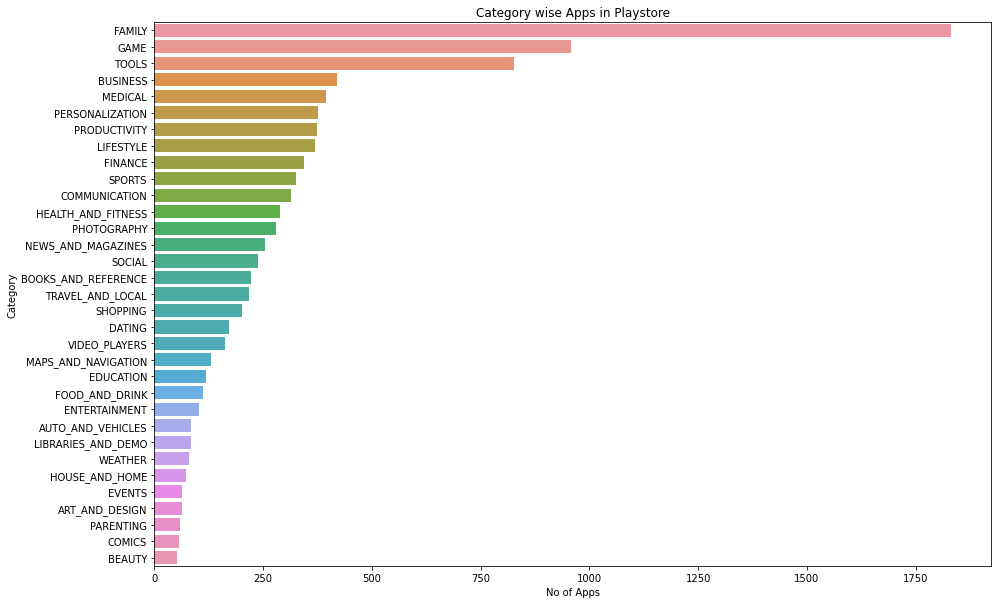

In [16]:
from matplotlib import figure
#For Graphical Repesentation by Bar Plot:
plt.figure(figsize=(15,10))
sns.barplot(category_wise, category_wise.index)
plt.ylabel('Category')
plt.xlabel('No of Apps')
plt.title('Category wise Apps in Playstore')
plt.show()

###Obervation: 

* From the above bar plot chart, Playstore have maximum number of apps in Family category and then Games, Tools...etc


##2. Comparison of Category vs Installs

In [17]:
#Lets Compare Category with Installs of apps:
category_installs=dataset.groupby(['Category'])['Installs'].mean().sort_values(ascending=False).head(10)
category_installs

Category
COMMUNICATION         3.504215e+07
VIDEO_PLAYERS         2.409143e+07
SOCIAL                2.296179e+07
ENTERTAINMENT         2.072216e+07
PHOTOGRAPHY           1.654501e+07
PRODUCTIVITY          1.548955e+07
GAME                  1.447229e+07
TRAVEL_AND_LOCAL      1.321866e+07
TOOLS                 9.675661e+06
NEWS_AND_MAGAZINES    9.327629e+06
Name: Installs, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


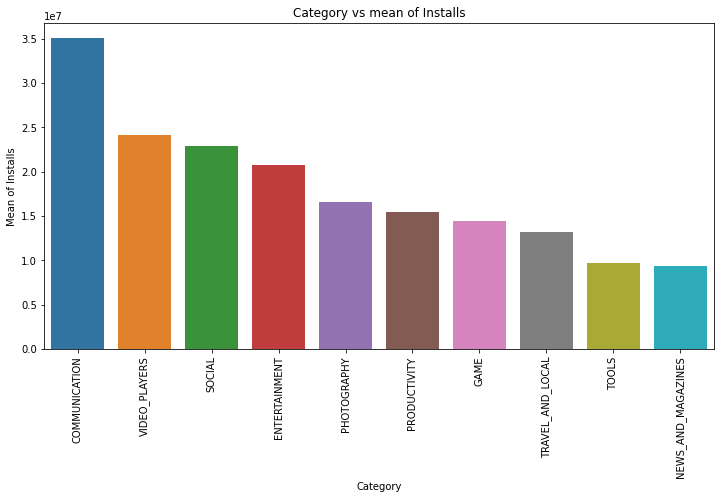

In [18]:
# Graphical represention of Category vs Installs of apps:
plt.figure(figsize=(12,6))
sns.barplot(category_installs.index, category_installs)
plt.ylabel('Mean of Installs')
plt.xlabel('Category')
plt.title('Category vs mean of Installs')
plt.xticks(rotation=90)
plt.show()

###Obervation: 
* Most number of times users installed Communication Category apps and then Video Players, Social category etc... 

## 3. Rating among the apps in Playstore

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


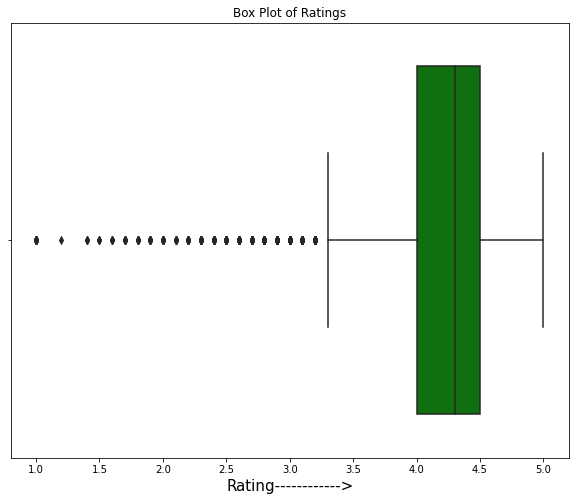

In [19]:
#use of boxplot will check how ratings are in Play Store:
plt.figure(figsize=(10,8))
sns.boxplot(dataset["Rating"],color="g")
plt.xlabel("Rating------------>", fontsize=15)
plt.title("Box Plot of Ratings")
plt.show()

###Observation:
* This box plot shows maximum number of users rated between 4.0 to 4.5.

##4. Content Ratings in Playstore

In [20]:
dataset['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

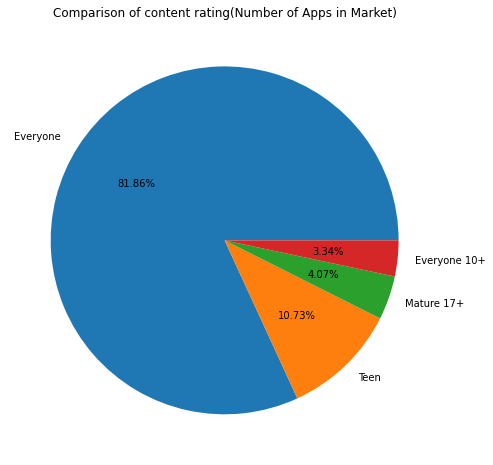

In [21]:
# Lets Check counts of content Rating present in playstore:
content_rating=dataset['Content Rating'].value_counts()[:4]
plt.figure(figsize=(10,8))
plt.pie(content_rating,labels=['Everyone ','Teen','Mature 17+','Everyone 10+'],autopct='%.2f%%')
plt.title("Comparison of content rating(Number of Apps in Market)")
plt.show()

###Obervation: 
* Everyone content Category having Highest number of apps and then Teen, Mature 17+, Everyone 10+ etc... 

## 5. Content Rating vs Installs of Apps

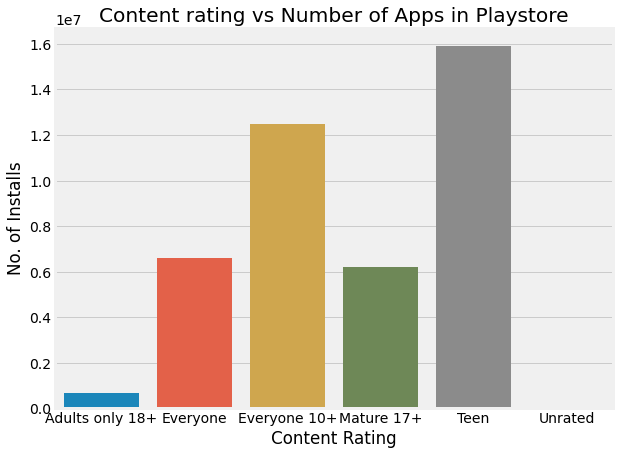

In [22]:
# Graphical represention of content Rating vs Installs of apps:
condent_installs=dataset.groupby(["Content Rating"])['Installs'].mean().reset_index()
condent_installs_df=pd.DataFrame(condent_installs)
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.barplot(y="Installs",x="Content Rating",data=condent_installs_df)
plt.title("Content rating vs Number of Apps in Playstore")
plt.ylabel("No. of Installs")
plt.xlabel("Content Rating")
plt.show()

###Obervation: 
* Teen and Everyone content Category having Most number of apps installed by users and then Everyone, Mature 17+, etc... 

## 6. Paid vs Free Apps in Playstore

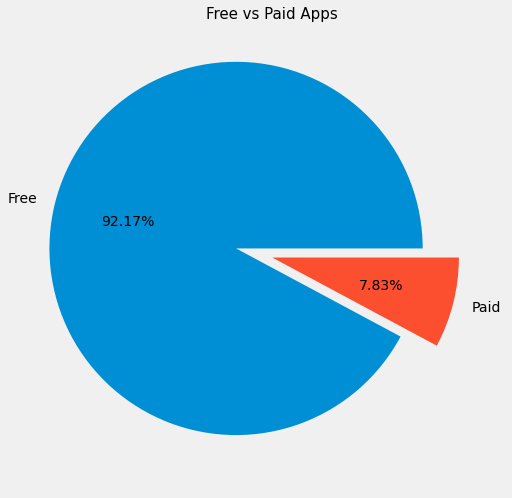

In [23]:
# Paid Apps vs Free Apps presents in market:
plt.subplots(figsize=(12,8))
Free_vs_paid = dataset.groupby('Type').size()
explode = (0.2,0)
plt.pie(Free_vs_paid, explode=explode,labels=['Free','Paid'],autopct='%.2f%%')
plt.title('Free vs Paid Apps', size = 15)
plt.show()

###Obervation: 
* Free Type apps have highest number of apps present in the Playstore compared to Paid apps
* Because Android users likes free apps mostly.

##7. Category wise Free and Paid Apps

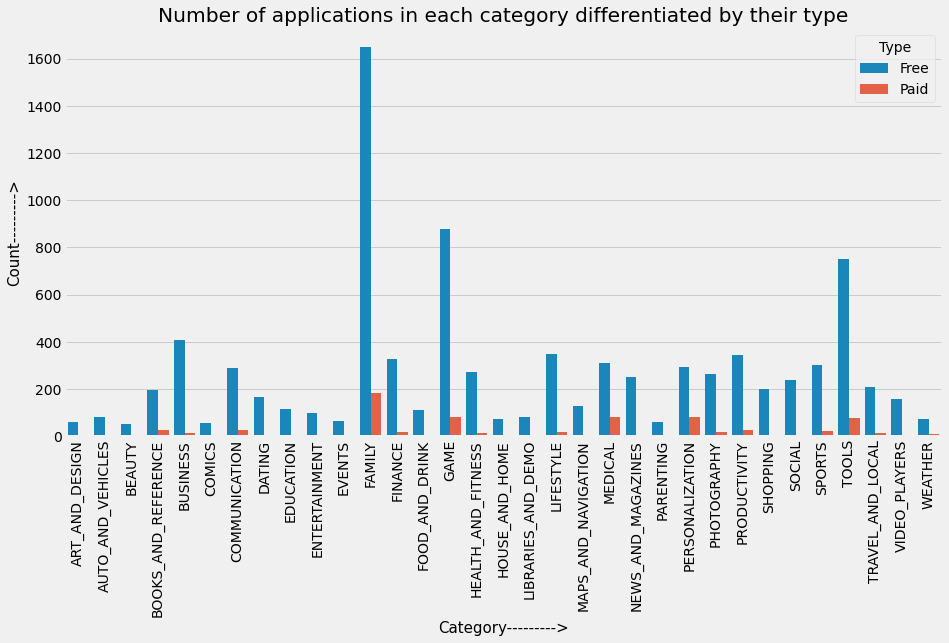

In [24]:
#Lets Check Category wise Free and Paid Apps
Free_Paid_apps=dataset.groupby(["Category","Type"])["App"].count().reset_index()
Free_Paid_apps_df=pd.DataFrame(Free_Paid_apps)
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
sns.barplot(x="Category",y="App",hue="Type",data=Free_Paid_apps_df)
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Count--------->", fontsize=15)
plt.title("Number of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show()

###Obervation: 
* Free Apps - Family Category have highest number of apps and then Game, Tools,...etc.
* Paid Apps - Paid app same like free apps, Family category have highest number of apps present in playstore and then Game, Medical, Personalization, Tools,...etc.

##8. Effect of size on rating

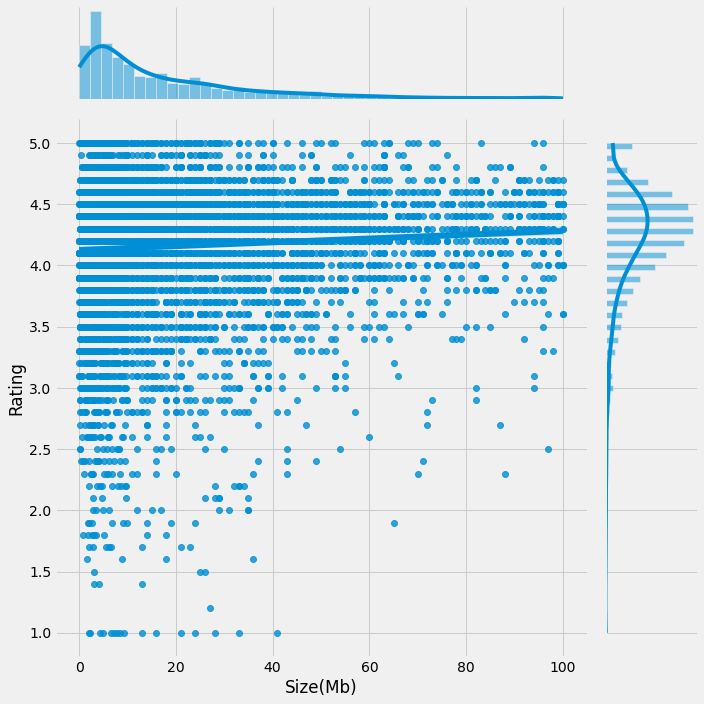

In [25]:
# Visualize the relation between 'Size' and 'Rating'.
sns.jointplot(x = dataset['Size(Mb)'], y = dataset['Rating'], height=10,  kind= 'reg')
plt.show()

###Obervation: 
* From the above comparison between Size and Ratings discover that users like less size apps.

##9. Effect of price on rating

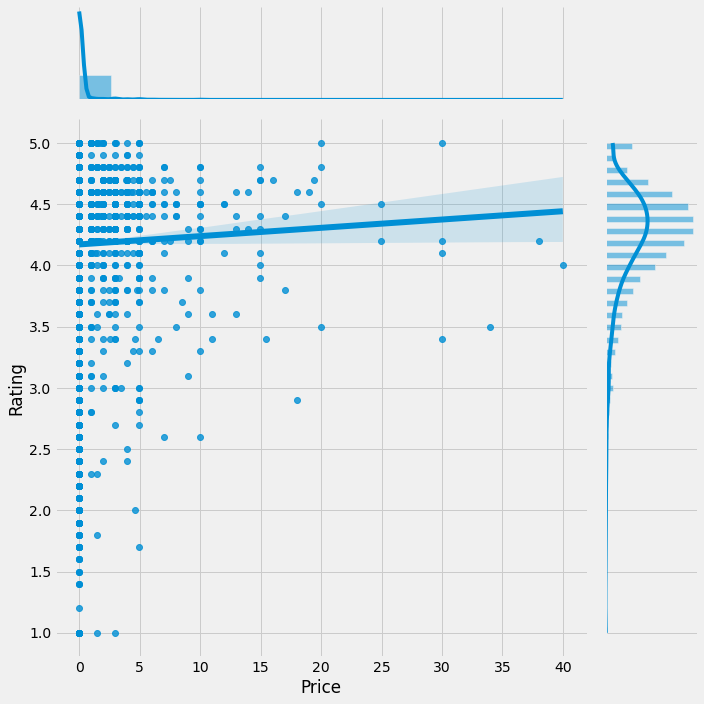

In [26]:
# Visualize the relation between 'Price' and 'Rating'.
sns.jointplot(x = dataset[dataset['Price']<40]['Price'], y = dataset['Rating'], height=10, kind ='reg')
plt.show()

###Obervation: 
* From the above comparision between Price and Ratings Shows that users likes less Price apps.

##10. Top 5 Apps of Most Reviews

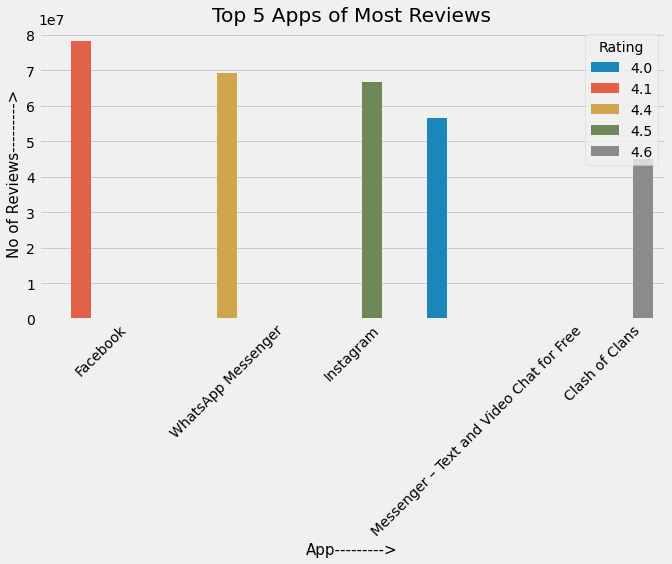

In [27]:
#Get top 5 apps by reviews:
top_5=dataset.sort_values('Reviews',ascending=False).reset_index().head(5)

plt.figure(figsize=(10,5))
sns.barplot(x="App",y="Reviews",hue='Rating',data=top_5)
plt.xlabel("App--------->", fontsize=15)
plt.ylabel("No of Reviews--------->", fontsize=15)
plt.title("Top 5 Apps of Most Reviews")
plt.xticks(rotation=45)
plt.show()

##11. Correlation between columns

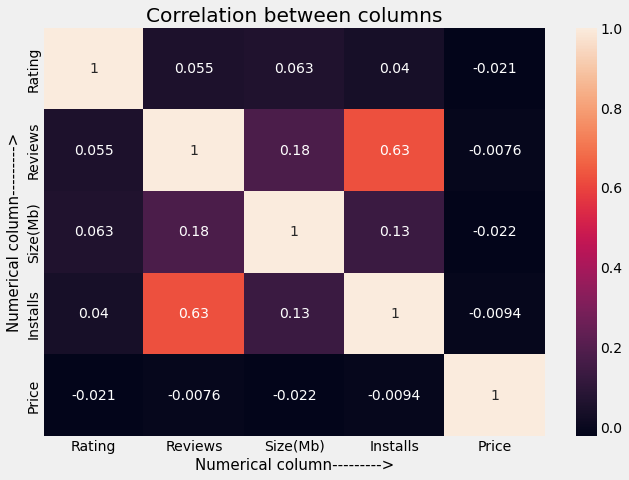

In [30]:
# Correlation between columns in our DataSet using Heatmap:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Correlation between columns")
sns.heatmap(dataset.corr(),annot=True,robust=True)
plt.xlabel("Numerical column--------->", fontsize=15)
plt.ylabel("Numerical column--------->", fontsize=15)
plt.show()

## Obsevation:
* From the above Heat Map shows high correlation in column between Installs and Reviews.

#**Sentiment Analysis**

This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

* App : Name of the app.

* Translated_Review: review for translated to English language from another language.

* Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

* Sentiment_Polarity: A values range from -1 (most negative) to 1 (most positive) by indicating the positivity or negativity of the sentiment. 

* Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [31]:
#We Have Another Data set of Sentiment, Lets to Analysis:
#Check Data information
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [32]:
# Merge reviews dataset with apps 
merge_df = pd.merge(dataset, dataset1, on='App', how = 'inner')
merge_df

,App,Category,Rating,Reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61551,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
61552,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
61553,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200,0.200000
61554,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000,0.000000


In [33]:
#Number of reviews of Each app (by Repeation App Present in Dataset):
merge_df['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
Helix Jump                                           300
8 Ball Pool                                          300
                                                    ... 
Azpen eReader                                         32
Dresses Ideas & Fashions +3000                        31
Easy Healthy Recipes                                  31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1020, dtype: int64

##12. Percentage of Review Sentiments

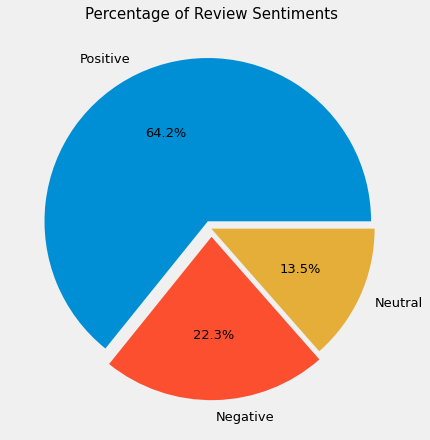

In [34]:
#Percentage of Review Sentiments by Piechart:
plt.figure(figsize=(10,7))
slices=merge_df['Sentiment'].value_counts()
plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(slices,labels=['Positive','Negative','Neutral'],explode = (0.05,0.05,0),autopct='%1.1F%%')
plt.title('Percentage of Review Sentiments', fontsize=15)
plt.show()

###Observation:
* From the over all apps review Sentiments, playstore apps getting positive reviews of 64.1% then negative have 22.1% and 13.8% Neutral reviews.

##**13. Sentiment Polarity**




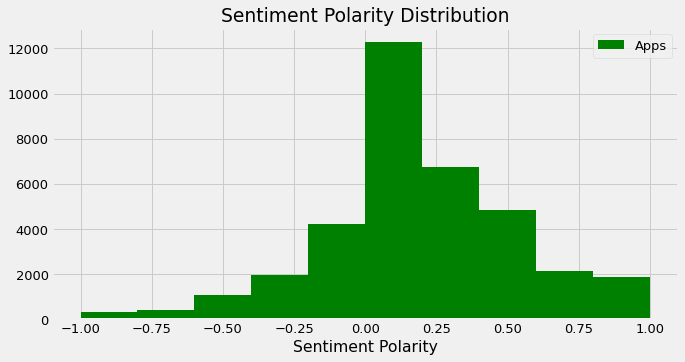

In [35]:
#Sentiment polarity
plt.figure(figsize=(10,5))
plt.hist(merge_df["Sentiment_Polarity"], color="green", label="Apps")
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

###Observation:
* From Sentiment Polarity, Most of the apps getting positive reviews.

##**14. Sentiment Subjectivity**

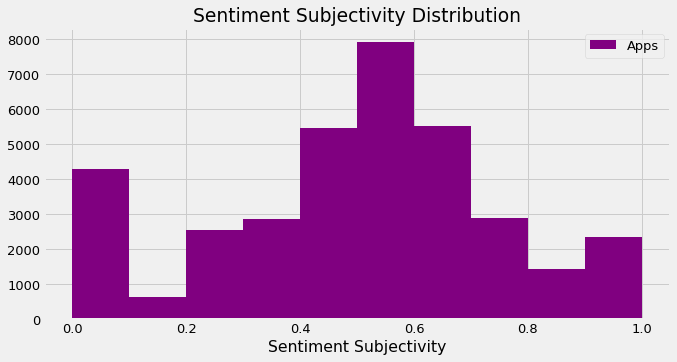

In [36]:
# Sentiment subjectivity for apps
plt.figure(figsize=(10,5))
plt.hist(merge_df["Sentiment_Subjectivity"], color="purple", label="Apps")

plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Sentiment Subjectivity')
plt.legend(loc='upper right')
plt.show()

### Observation:
* The maximum number of sentiment subjectivity of Apps between 0.4 to 0.7. From this, we can conclude that the maximum number of the Users give reviews to the applications, according to their own experience.

##15. Top 10 Categories of Positive Reviews Sentiment

In [37]:
#get all positive apps:
pos_df=merge_df[merge_df['Sentiment']=='Positive']
pos_df

,App,Category,Rating,Reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
9,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000
10,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Love,Positive,0.500000,0.600000
11,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love enjoyable fun,Positive,0.433333,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61534,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,I like much.,Positive,0.200000,0.200000
61540,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
61546,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
61553,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000


In [38]:
#make a Dataframe of top 10 categories
senti_df=pos_df.groupby(['Category'])['Sentiment'].value_counts().rename_axis(['Category','Senti_Type']).reset_index()
sorted_Senti_df=senti_df.sort_values('Sentiment',ascending=False).head(10)
sorted_Senti_df

,Category,Senti_Type,Sentiment
14,GAME,Positive,3936
15,HEALTH_AND_FITNESS,Positive,1754
11,FAMILY,Positive,1249
7,DATING,Positive,1068
30,TRAVEL_AND_LOCAL,Positive,1034
25,PRODUCTIVITY,Positive,990
20,MEDICAL,Positive,967
28,SPORTS,Positive,938
12,FINANCE,Positive,911
29,TOOLS,Positive,876


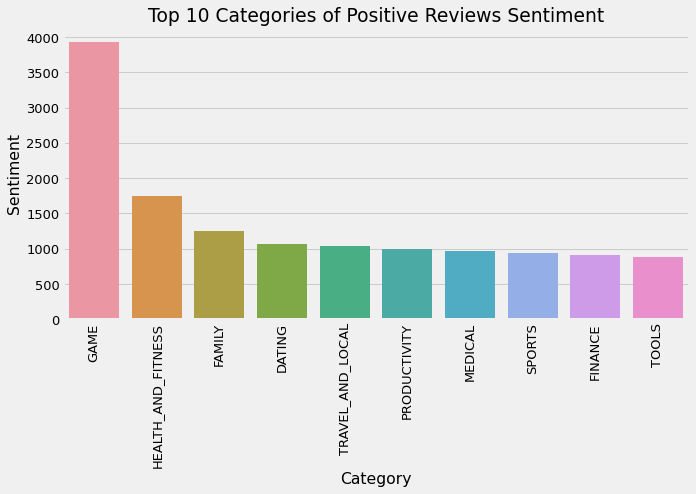

In [39]:
#Bar plot using seaborn:
plt.figure(figsize=(10,5))
sns.barplot(x=sorted_Senti_df['Category'],y=sorted_Senti_df['Sentiment'])
plt.xticks(rotation=90)
plt.title('Top 10 Categories of Positive Reviews Sentiment')
plt.show()

#Conclusion

From the above analysis, we can conclude that:


* The highest amount of application base on categories is family, followed by game and tools.
*Communication Category  has highest number of times users installed apps and then Video Players, Social category etc... .
* The highest amount of reviews in total is achieved by game category, but the highest amount of reviews/app is achieved by social. It means user is likely to review social applications compare to other categories.
* when we comparing Genere with installs of application Communication Category apps have highest installation and then Video Players, Social category and then Adventure;Action & Adventure etc... 
* In this distribution ratings majority of the apps had a rating of 4.3, and most apps lie between 4 and 5.
* Everyone content Category having Highest number of apps and then Teen.
* Free Type apps have highest number of apps present in the Playstore compared to Paid apps.Because Android users likes free apps mostly. both free and paid apps had most family category apps.
* price and reviews effect in ratings,users like mostly less size apps and low price apps.
* if Reviews of the apps is  high, installation also high. beacuse users installs only popular and most reviewed apps.
*In review sentiment analysis, most of the apps got positive reviews and 'Game' categories had highest positive reviews and then 'Health and Fitness', 'Family', Dating..etc
* The maximum number of sentiment subjectivity of Apps between 0.4 to 0.7. From this, we can conclude that the maximum number of the Users give reviews to the applications, according to their own experience.


## Thank You...